## Solutions to Exercises: Session 6

Again, you will be working with the Netflix data. So, make sure that you load the usual modules (pandas, numpy, seaborn, matplotlib) as well as the data.

### 1. Take a look at the 'country' variable - which indicates the country in which a film was produced.

a. Of which datatype is this variable?

b. Convert this variable to type 'string'.

c. Remove all rows with null values in the 'country' column.

d. Use the 'split' command to split the countries by ', ' such that each country is recognized.

e. Explode the dataframe along the variable 'country' such that each country-film pair has one row.

f. How many different countries are there in the dataset?

g. How many movies were produced in the U.S.?

### 2. Consider the relationship between 'duration' and 'release_year'.

First, execute the following code to modify the 'duration' variable.

<<import re

df_netflix = df_netflix.loc[df_netflix['duration'].str.contains('min') == True]

df_netflix['duration'] = df_netflix['duration'].apply(lambda x: int(''.join(re.findall('[0-9]', str(x)))))>>

a. What is the average film duration for every year?

b. Use a regresion plot ('regplot') to visualize the relationship between year and film duration.

c. Use a lineplot to visualize the mean duration of movies over time.

In [114]:
# let's load the usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
# let's load the data (again, you will have to adjust the path)
df_netflix = pd.read_csv('../python_basics_johanna/data/netflix_titles.csv')

### 1. Take a look at the 'country' variable - which indicates the country in which a film was produced.

a. Of which datatype is this variable?

In [116]:
df_netflix['country'].dtype

dtype('O')

b. Convert this variable to type 'string'.

In [117]:
df_netflix['country'] = df_netflix['country'].astype(str)
df_netflix['country'].dtype

dtype('O')

c. Remove all rows with null values in the 'country' column.

In [118]:
df_netflix = df_netflix.loc[df_netflix['country'] != 'nan']
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...


d. Use the 'split' command to split the countries by ', ' such that each country is recognized.

In [119]:
df_netflix['country'] = df_netflix['country'].apply(lambda x: x.split(', '))

e. Explode the dataframe along the variable 'country' such that each country-film pair has one row.

In [120]:
df_netflix_country_explode = df_netflix.explode('country')

In [121]:
df_netflix_country_explode.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ethiopia,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


f. How many different countries are there in the dataset?

In [122]:
len(set(df_netflix_country_explode['country']))

127

g. How many movies were produced in the U.S.?

In [123]:
len(df_netflix_country_explode.loc[df_netflix_country_explode['country'] == 'United States'])

3689

### 2. Consider the relationship between 'duration' and 'release_year'.

In [124]:
import re
df_netflix = df_netflix.loc[df_netflix['duration'].str.contains('min') == True]
df_netflix['duration'] = df_netflix['duration'].apply(lambda x: int(''.join(re.findall('[0-9]', str(x)))))

In [125]:
df_netflix.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","[Germany, Czech Republic]","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",[India],"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",[United States],"September 20, 2021",2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",[United States],"September 19, 2021",2013,PG-13,97,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","[United States, India, France]","September 19, 2021",2013,PG-13,106,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","[China, Canada, United States]","September 16, 2021",2017,PG-13,96,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",[United States],"September 16, 2021",1975,PG,124,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...


a. What is the average film duration for every year.

In [126]:
df_netflix.groupby('release_year')['duration'].mean()

release_year
1942    35.000000
1943    62.666667
1944    52.000000
1945    51.333333
1946    58.000000
          ...    
2017    95.484225
2018    97.417952
2019    94.865487
2020    93.357918
2021    98.739645
Name: duration, Length: 73, dtype: float64

b. Use a regresion plot ('regplot') to visualize the relationship between year and film duration.

c:\users\johanna.schnier\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


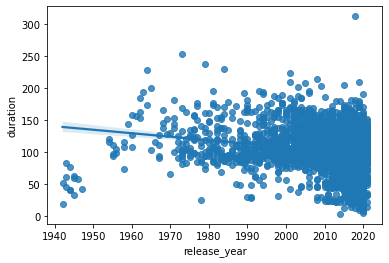

In [127]:
sns.regplot(df_netflix['release_year'], df_netflix['duration'])

c. Use a lineplot to visualize the mean duration of movies over time.

In [128]:
df_netflix_mean = df_netflix.groupby('release_year')['duration'].mean().reset_index(name='duration_mean')
df_netflix_mean

,release_year,duration_mean
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000
...,...,...
68,2017,95.484225
69,2018,97.417952
70,2019,94.865487
71,2020,93.357918


c:\users\johanna.schnier\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


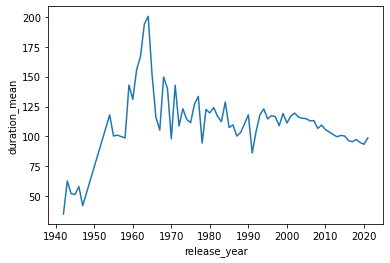

In [129]:
sns.lineplot('release_year', 'duration_mean', data=df_netflix_mean)